<a href="https://colab.research.google.com/github/sonukiran3101/Sonu07/blob/master/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

STEP - 1: Import the necessary libraries


1.   torchvision is used to import the images datasets and for visualizations 
2.   transforms are used to "resize the images that are imported"



In [7]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

STEP - 2 : Check whether the notebook is running on CPU or GPU

In [9]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


STEP - 3: 
Import the MNIST dataset into the google colab.
"Here, iam importing into colab not into the drive." 
1.   The MNIST dataset is intially in the numpy arrays. 
2.   As pytorch needs input in the form of TENSORS, we need to convert the dataset into tensor format. So, we used transforms.ToTensor()  
3.   And download = True , it means to download the dataset into the local system.
4.   We import the train and test datasets respectively as below and check their shapes



In [10]:
train_dataset = torchvision.datasets.MNIST(
    root = '.',
    train = True,
    transform = transforms.ToTensor(),
    download = True
)

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw


Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [12]:
train_dataset.data.shape # Checking the size or amount of data in the train_dataset

torch.Size([60000, 28, 28])

In [14]:
test_dataset = torchvision.datasets.MNIST(
    root = '.',
    train = False,
    transform = transforms.ToTensor(),
    download = True
)

In [15]:
test_dataset.data.shape  # Checking the size or amount of data in the test_dataset

torch.Size([10000, 28, 28])

In [38]:
# The most important thing is to select the "batchsize"
# We have 60000 images in the training dataset. We cant take them all at a time into our NeuralNetworks. We take al 60k images into 120 batches 
# We take the batch_size
# We load the dataset by shuffling the data(images)
batch_size = 128
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle= False)

STEP - 4: Model Creation


In [39]:
# Here we make a ANN model

class ANN(nn.Module):
  def __init__(self,K):
    super(ANN,self).__init__()

    self.layers = nn.Sequential(
    nn.Linear(784,512),
    nn.ReLU(),
    nn.Linear(512,10)
    )
  def forward(self,x):
    x = x.view(x.size(0),-1)  ## Convert 28x28 image into an array of 784
    x = self.layers(x)
    return x

In [40]:
model = ANN(10)
model.to(device)   # This line is sending the model to the GPU

ANN(
  (layers): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=10, bias=True)
  )
)

In [41]:
## Once the model is set into the GPU , we should use the loss function
# For the multi class problem we use the loss function as Categorical Cross Entropy
# We use the optimization function also. Here we are using RMSprop. 
# In the above we didnot use SOFTMAX ACTIVATION FUNCTION because it is already predefined in CrossEntropLoss (i.e. categorical cross entropy) 
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.RMSprop(model.parameters()) # optimizers are used to make the model learn faster

In [42]:
n_epochs = 5
train_loses = np.zeros(n_epochs)
test_loses = np.zeros(n_epochs)

for it in range(n_epochs):
  train_loss=[]
  t0 = datetime.now()
  for inputs, targets in train_dataloader:                         # Here, we are giving inputs(images) and targets(already outputs that are present)
    inputs, targets = inputs.to(device), targets.to(device)                        
    #targets = targets.to(torch.float32)
    optimizer.zero_grad()                          # This step says that, the memory(previous weights) are released from the optimizer when ever we run this step.                     
    inputs = inputs.view(-1,784)                   
    outputs = model(inputs)                         
    loss = criterion(outputs,targets)              # loss is nothing but, using criterion that is CrossEntropyLoss() we find error btwn ( output,targets) 
    loss.backward()                                # This step is for back propagation
    optimizer.step()                               # Now this optimizer.step will modify the weights when the back propagation is done
    train_loss.append(loss.item())
  train_loss = np.mean(train_loss)

# Optimization is done only in training datasets not on testing datasets

  test_loss=[]
  for inputs, targets in test_dataloader:
    inputs, targets = inputs.to(device), targets.to(device)
    #targets = targets.to(torch.float32)
    inputs = inputs.view(-1,784)
    outputs = model(inputs)
    loss = criterion(outputs,targets)
    test_loss.append(loss.item())
  test_loss = np.mean(test_loss)

  train_loses[it] = train_loss
  test_loses[it] = test_loss

  dt = datetime.now() - t0
  print(f'Epoch {it+1}/{n_epochs}, Train loss: {train_loss:.4f}, \
   Test loss: {test_loss:.4f}, Duration : {dt}')


Epoch 1/5, Train loss: 1.1357,    Test loss: 0.1775, Duration : 0:00:04.981909
Epoch 2/5, Train loss: 0.1342,    Test loss: 0.1177, Duration : 0:00:04.895966
Epoch 3/5, Train loss: 0.1014,    Test loss: 0.1231, Duration : 0:00:04.810621
Epoch 4/5, Train loss: 0.0873,    Test loss: 0.1136, Duration : 0:00:04.893120
Epoch 5/5, Train loss: 0.0738,    Test loss: 0.1418, Duration : 0:00:04.741283


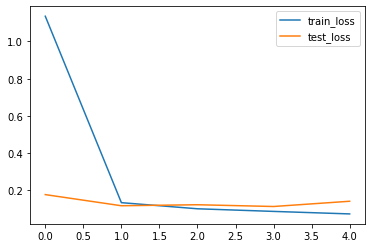

In [45]:
# Graphical Representation is done
import matplotlib.pyplot as plt
plt.plot(train_loses, label = 'train_loss')
plt.plot(test_loses, label = 'test_loss')
plt.legend()
plt.show()

In [49]:
## Now to find accuracy the code is...

# For Train_data
n_correct=0
n_total=0

train_acc=0
for inputs,targets in train_dataloader:
  inputs, targets = inputs.to(device),targets.to(device)
  inputs = inputs.view(-1,784)
  outputs = model(inputs)
  try:
    _,prediction = torch.max(outputs,1) # Similar to np.argmax() --> this will find out indices of the large number in the array
  except Exception as e:  
      print(e)
      print(output)
  n_correct += (prediction==targets).sum().item()
  n_total += targets.shape[0]

train_acc = n_correct/n_total  

# For Test_data

n_correct=0
n_total=0

test_acc=0
for inputs,targets in test_dataloader:
  inputs, targets = inputs.to(device),targets.to(device)
  inputs = inputs.view(-1,784)
  outputs = model(inputs)
  try:
    _,prediction = torch.max(outputs,1) # Similar to np.argmax() --> this will find out indices of the large number in the array
  except Exception as e:
      print(e)
      print(output)
  n_correct += (prediction==targets).sum().item()
  n_total += targets.shape[0]

test_acc = n_correct/n_total

print(f"Train accuracy: {train_acc:.4f}, Test accuracy: {test_acc:.4f}")

Train accuracy: 0.9827, Test accuracy: 0.9666
